<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json


In [0]:
covidtrackingurl = "https://covidtracking.com/api/states/daily"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-20-2020.csv"
dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['state', 'country', 'last_update',
                               'confirmed', 'dead', 'recovered', 'lat','lon'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [6]:
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending', 'total']].sum()
print(res)
print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

positive     23203
negative    156017
pending       3477
total       182697
dtype: int64
Current Infection Rate 12.700263%


In [7]:
dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(),['state', 'positive']].sort_values(by='positive', ascending=False).head(10)

,state,positive
37,NY,10356
52,WA,1524
34,NJ,1327
5,CA,1279
24,MI,787
16,IL,759
10,FL,658
20,LA,585
21,MA,525
11,GA,507


In [0]:
#Compare growth from 20200311 and 202020313
dtstart = 20200311
dtend = 20200317
dfCA = dfCovidtracking[dfCovidtracking.state=='CA']

In [9]:
arCols = ['positive', 'negative', 'death']
arTotCols= ['positive', 'negative']

dfUSAstart = dfCovidtracking.loc[dfCovidtracking.date == dtstart, arCols].sum()
print(dfUSAstart)
print(dfUSAstart.loc[arTotCols].sum())
dfUSAend = dfCovidtracking.loc[dfCovidtracking.date == dtend, arCols].sum()
print(dfUSAend)
print(dfUSAend.loc[arTotCols].sum())


positive    1053
negative    5978
death         27
dtype: int64
7031
positive     5723
negative    47604
death          90
dtype: int64
53327


In [0]:
gbUSA = dfCovidtracking.groupby(['date'])
gbCA = dfCovidtracking[dfCovidtracking.state=='CA'].groupby(['date'])

dfUSAPos = gbUSA.positive.sum().reset_index().copy()
dfCAPos = gbCA.positive.sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 
dfUSAPos['PCT']= dfUSAPos.positive/dfUSAPos.max().positive
dfCAPos['PCT']=dfCAPos.positive/dfCAPos.max().positive

In [11]:
dfUSAPos

,date,positive,PCT
0,20200304,118,0.005086
1,20200305,176,0.007585
2,20200306,223,0.009611
3,20200307,341,0.014696
4,20200308,417,0.017972
5,20200309,584,0.025169
6,20200310,778,0.033530
7,20200311,1053,0.045382
8,20200312,1315,0.056674
9,20200313,1922,0.082834


In [12]:
dfCAPos

,date,positive,PCT
0,20200304,53,0.041439
1,20200305,53,0.041439
2,20200306,60,0.046912
3,20200307,69,0.053948
4,20200308,88,0.068804
5,20200309,114,0.089132
6,20200310,133,0.103987
7,20200311,157,0.122752
8,20200312,202,0.157936
9,20200313,202,0.157936


In [13]:
gbUSA.sum()

,positive,negative,pending,hospitalized,death,total
date,,,,,,
20200304,118,748,103,0.0,0,969
20200305,176,953,197,0.0,0,1326
20200306,223,1571,458,0.0,0,2252
20200307,341,1809,602,0.0,0,2752
20200308,417,2335,347,0.0,0,3099
20200309,584,3367,313,0.0,0,4264
20200310,778,3807,469,0.0,0,5054
20200311,1053,5978,563,0.0,27,7617
20200312,1315,7949,673,0.0,36,9966


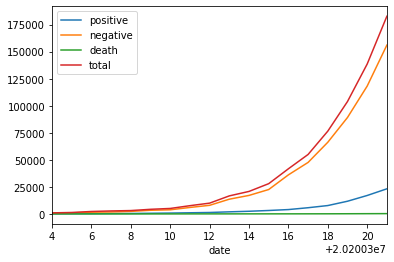

In [14]:
gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

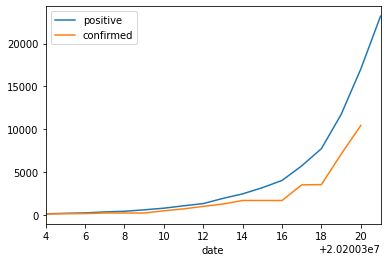

In [15]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

In [16]:
gbCA.sum().sort_values(by='date')

,positive,negative,pending,hospitalized,death,total
date,,,,,,
20200304,53,462,0,0.0,0,515
20200305,53,462,0,0.0,0,515
20200306,60,462,0,0.0,0,522
20200307,69,462,0,0.0,0,531
20200308,88,462,0,0.0,0,550
20200309,114,690,0,0.0,0,804
20200310,133,690,0,0.0,0,823
20200311,157,916,0,0.0,0,1073
20200312,202,916,0,0.0,4,1118


In [17]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    19101
dead           244
dtype: int64

In [18]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    1177
dead           23
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [20]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
China             81250
Italy             47021
Spain             20410
Germany           19848
Iran              19644
US                19101
France            12632
Korea, South       8652
Switzerland        5294
United Kingdom     4014
Name: confirmed, dtype: int64

In [21]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(20)

country
China             81250
Italy             47021
Spain             20410
Germany           19848
Iran              19644
US                19101
France            12632
Korea, South       8652
Switzerland        5294
United Kingdom     4014
Netherlands        3003
Austria            2388
Belgium            2257
Norway             1914
Sweden             1639
Denmark            1337
Malaysia           1030
Portugal           1020
Japan               963
Canada              943
Name: confirmed, dtype: int64

In [0]:
dfData = dfCovidtracking.groupby('date')

In [0]:
dfStateTotal = dfCovidtracking[['state', 'positive']].groupby(by='state').max() \
.rename(columns={'positive':'current_total'})


In [0]:
dfState = dfCovidtracking[['date','state','positive']].set_index('state') \
  .join(dfStateTotal)

In [0]:
dfState['pct']=dfState.positive/dfState.current_total

In [26]:
dfState.head()

,date,positive,current_total,pct
state,,,,
AK,20200321,14,14,1.000000
AK,20200320,12,14,0.857143
AK,20200319,6,14,0.428571
AK,20200318,6,14,0.428571
AK,20200317,3,14,0.214286


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

In [28]:
res.head()

state,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,FL,GA,GU,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MP,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20200304,0.0,0.0,0.0,0.0,0.019231,0.041439,0.000000,0.000000,0.000000,0.0,0.003040,0.003945,0.0,0.000000,0.0,0.0,0.005270,0.000000,0.000000,0.000000,0.0,0.003810,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.005435,0.0,0.000000,0.036364,0.000000,0.0,0.000000,0.000579,0.0,0.000000,0.026316,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.003289,0.000000,0.000000,0.0,0.000000,0.025591,0.003559,0.0,0.0
20200305,0.0,0.0,0.0,0.0,0.019231,0.041439,0.000000,0.000000,0.000000,0.0,0.013678,0.003945,0.0,0.000000,0.0,0.0,0.006588,0.000000,0.000000,0.000000,0.0,0.003810,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.005435,0.0,0.000000,0.036364,0.000754,0.0,0.008065,0.002124,0.0,0.000000,0.026316,0.000000,0.0,0.000000,0.000000,0.0,0.002695,0.003289,0.000000,0.000000,0.0,0.000000,0.045932,0.003559,0.0,0.0
20200306,0.0,0.0,0.0,0.0,0.028846,0.046912,0.005510,0.000000,0.000000,0.0,0.013678,0.003945,0.0,0.000000,0.0,0.0,0.006588,0.007937,0.000000,0.000000,0.0,0.015238,0.015789,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.010870,0.0,0.000000,0.036364,0.000754,0.0,0.008065,0.003187,0.0,0.000000,0.026316,0.005391,0.0,0.000000,0.000000,0.0,0.002695,0.016447,0.000000,0.000000,0.0,0.000000,0.051837,0.003559,0.0,0.0
20200307,0.0,0.0,0.0,0.0,0.048077,0.053948,0.022039,0.000000,0.000000,0.0,0.021277,0.011834,0.0,0.027027,0.0,0.0,0.007905,0.007937,0.000000,0.018519,0.0,0.024762,0.015789,0.0,0.0,0.007246,0.000000,0.0,0.0,0.0,0.010870,0.0,0.026316,0.036364,0.003014,0.0,0.008065,0.007339,0.0,0.018868,0.061404,0.005391,0.0,0.030303,0.013158,0.0,0.002695,0.026316,0.007353,0.000000,0.0,0.000000,0.066929,0.003559,0.0,0.0
20200308,0.0,0.0,0.0,0.0,0.048077,0.068804,0.022039,0.005155,0.012987,0.0,0.025836,0.013807,0.0,0.027027,0.0,0.0,0.007905,0.015873,0.018182,0.018519,0.0,0.024762,0.015789,0.0,0.0,0.007246,0.013699,0.0,0.0,0.0,0.010870,0.0,0.026316,0.072727,0.004521,0.0,0.008065,0.010139,0.0,0.018868,0.122807,0.010782,0.0,0.045455,0.013158,0.0,0.008086,0.026316,0.007353,0.013158,0.0,0.034483,0.066929,0.003559,0.0,0.0


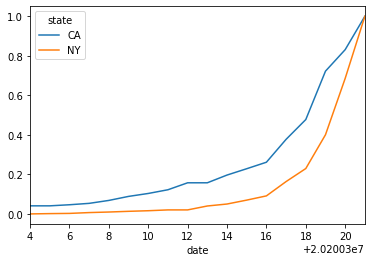

In [29]:
res.loc[:, ['CA','NY']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

In [31]:
dfNYTesting.head()

,negative
date,
20200321,35081
20200320,25325
20200319,18132
20200318,12215
20200317,5506


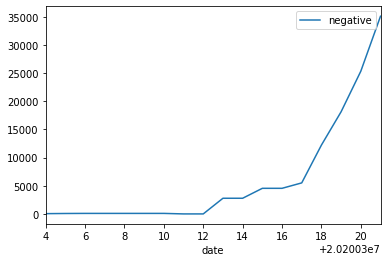

In [32]:
dfNYTesting.plot.line()